In [7]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from IPython.display import Image

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter_6_decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    
def save_tree(tree, feature_names, class_names, rounded=True, filled=True):
    # This is the simplest way for now, even if it includes shelling out/temp files

    # Export graphviz
    export_graphviz(
        tree,
        out_file="temp_tree.dot",
        feature_names=feature_names,
        class_names=class_names,
        rounded=rounded,
        filled=filled
    )
    
    !dot -Tpng temp_tree.dot -o temp_tree.png
    !rm temp_tree.dot

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

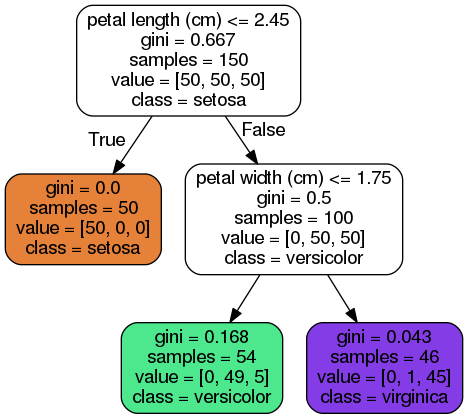

In [10]:
save_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names)
# Kind of a hack atm
Image('temp_tree.png')

In [12]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

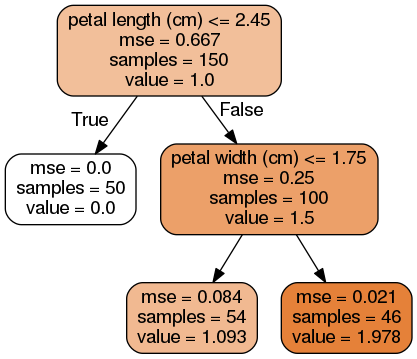

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

save_tree(tree_reg, feature_names=iris.feature_names[2:], class_names=iris.target_names)
Image('temp_tree.png')